# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [9]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [10]:
# Carregando features.txt

variaveis = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\features.txt"
df_variaveis = pd.read_csv(variaveis, sep=' ', header=None)

# Carregando subject_train.txt

treino = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt"
df_treino = pd.read_csv(treino, header=None)

# Carregando X_train.txt

treino_x = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
df_treino_x = pd.read_csv(treino_x, header=None, sep='\s+')

In [11]:
# Removendo a primeira coluna que ficou com o index duplicado

df_variaveis.drop(columns=0, inplace=True)

# Colocando as variáveis como coluna

df_treino_x.columns = df_variaveis

# Colocando a subject_train como uma nova coluna do dataframe

df_treino_x['subject_train'] = df_treino

# Resetando o index
# Quando eu utilizo esta função eu crio uma nova coluna com o index anterior

df_treino_x.reset_index(inplace=True)

# Setando o index anterior e o subject_train como indice

df_treino_x = df_treino_x.set_index(['index', 'subject_train'])

In [12]:
# Carregando a base de X_test.txt

teste_x = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt"
df_teste_x = pd.read_csv(teste_x, header=None, sep='\s+')


# Colocando as variáveis como coluna

df_teste_x.columns = df_variaveis

# Carregando o subject_test

teste = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\test\subject_test.txt"
df_teste = pd.read_csv(teste, header=None)


# Colocando a subject_teste como uma nova coluna do dataframe

df_teste_x['subject_teste'] = df_teste

# Resetando o index
# Quanop eu utilizo esta função eu crio uma nova coluna com o index anterior

df_teste_x.reset_index(inplace=True)

# Setando o index anterior e o subject_train como indice

df_teste_x = df_teste_x.set_index(['index', 'subject_teste'])

In [13]:
# Separando a base em treino e teste

X_test = df_teste_x
X_train = df_treino_x

caminho_teste_y = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt"
caminho_treino_y = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 17\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"

y_train = pd.read_csv(caminho_treino_y, header=None)
y_test = pd.read_csv(caminho_teste_y, header=None)

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [18]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

# Base de dados padronizada

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 172 ms
Wall time: 310 ms


,,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(fBodyBodyGyroJerkMag-meanFreq(),)","(fBodyBodyGyroJerkMag-skewness(),)","(fBodyBodyGyroJerkMag-kurtosis(),)","(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)"
index,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,1,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,1,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,1,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [25]:
# Aplicando o modelo

pca_pad = PCA()
princomp_pad = pca_pad.fit(X_train_pad)

componentes_pad = princomp_pad.transform(X_train_pad)

principal_pad = pd.DataFrame(data = componentes_pad)

In [29]:
# Variante explicada por componente

princomp_pad.explained_variance_

array([2.84882377e+02, 3.69176163e+01, 1.57441103e+01, 1.40471749e+01,
       1.05932789e+01, 9.67167599e+00, 7.69137434e+00, 6.72682578e+00,
       5.58677186e+00, 5.41413577e+00, 4.82488975e+00, 4.48957613e+00,
       4.28601963e+00, 3.62029526e+00, 3.54733958e+00, 3.36444093e+00,
       3.29166919e+00, 3.22803547e+00, 3.18603707e+00, 2.95812932e+00,
       2.80703601e+00, 2.73997116e+00, 2.68273445e+00, 2.62863804e+00,
       2.52051275e+00, 2.36196283e+00, 2.34486040e+00, 2.27524977e+00,
       2.17962058e+00, 2.17117122e+00, 2.05302931e+00, 1.98904447e+00,
       1.95195802e+00, 1.89161968e+00, 1.84948796e+00, 1.84128643e+00,
       1.79817037e+00, 1.65839981e+00, 1.60851275e+00, 1.59926822e+00,
       1.50777907e+00, 1.49012741e+00, 1.47770760e+00, 1.45215184e+00,
       1.39719783e+00, 1.38541213e+00, 1.35021431e+00, 1.32460557e+00,
       1.29186439e+00, 1.27665225e+00, 1.23512396e+00, 1.19754978e+00,
       1.16522200e+00, 1.13600604e+00, 1.12076267e+00, 1.10938101e+00,
      

In [35]:
# Variante explicada por componente, soma acumulada

princomp_pad.explained_variance_.cumsum()

array([284.88237655, 321.79999285, 337.54410316, 351.59127806,
       362.18455699, 371.85623299, 379.54760733, 386.27443311,
       391.86120496, 397.27534074, 402.10023049, 406.58980662,
       410.87582624, 414.49612151, 418.04346109, 421.40790202,
       424.69957121, 427.92760668, 431.11364375, 434.07177307,
       436.87880908, 439.61878024, 442.30151469, 444.93015273,
       447.45066548, 449.81262831, 452.15748871, 454.43273848,
       456.61235907, 458.78353029, 460.8365596 , 462.82560406,
       464.77756208, 466.66918177, 468.51866973, 470.35995616,
       472.15812653, 473.81652634, 475.42503909, 477.0243073 ,
       478.53208638, 480.02221378, 481.49992138, 482.95207322,
       484.34927106, 485.73468318, 487.0848975 , 488.40950307,
       489.70136746, 490.9780197 , 492.21314366, 493.41069344,
       494.57591544, 495.71192148, 496.83268414, 497.94206515,
       499.0319402 , 500.09917067, 501.15421471, 502.19888629,
       503.21691361, 504.21202095, 505.19985821, 506.17

In [26]:
# A primeira componente explica, aproximadamente, 51% das variâncias totais dos dados, já a segunda explica apenas 6,6% da variância total dos dados.

princomp_pad.explained_variance_ratio_

array([5.07811723e-01, 6.58068027e-02, 2.80643677e-02, 2.50395275e-02,
       1.88828501e-02, 1.72400642e-02, 1.37101147e-02, 1.19907768e-02,
       9.95859511e-03, 9.65086590e-03, 8.60051649e-03, 8.00280950e-03,
       7.63996369e-03, 6.45328924e-03, 6.32324346e-03, 5.99722090e-03,
       5.86750302e-03, 5.75407392e-03, 5.67921047e-03, 5.27295779e-03,
       5.00362925e-03, 4.88408406e-03, 4.78205784e-03, 4.68562930e-03,
       4.49289260e-03, 4.21027243e-03, 4.17978682e-03, 4.05570369e-03,
       3.88524168e-03, 3.87018044e-03, 3.65958878e-03, 3.54553381e-03,
       3.47942606e-03, 3.37187109e-03, 3.29676999e-03, 3.28215050e-03,
       3.20529478e-03, 2.95614939e-03, 2.86722415e-03, 2.85074548e-03,
       2.68766324e-03, 2.65619859e-03, 2.63405989e-03, 2.58850596e-03,
       2.49054872e-03, 2.46954034e-03, 2.40679913e-03, 2.36115075e-03,
       2.30278857e-03, 2.27567245e-03, 2.20164699e-03, 2.13466984e-03,
       2.07704456e-03, 2.02496620e-03, 1.99779441e-03, 1.97750625e-03,
      

In [34]:
# Soma acumulada

princomp_pad.explained_variance_ratio_.cumsum()

array([0.50781172, 0.57361853, 0.60168289, 0.62672242, 0.64560527,
       0.66284534, 0.67655545, 0.68854623, 0.69850482, 0.70815569,
       0.7167562 , 0.72475901, 0.73239898, 0.73885227, 0.74517551,
       0.75117273, 0.75704023, 0.76279431, 0.76847352, 0.77374648,
       0.77875011, 0.78363419, 0.78841625, 0.79310188, 0.79759477,
       0.80180504, 0.80598483, 0.81004053, 0.81392577, 0.81779595,
       0.82145554, 0.82500108, 0.8284805 , 0.83185237, 0.83514914,
       0.83843129, 0.84163659, 0.84459274, 0.84745996, 0.85031071,
       0.85299837, 0.85565457, 0.85828863, 0.86087714, 0.86336768,
       0.86583722, 0.86824402, 0.87060517, 0.87290796, 0.87518364,
       0.87738528, 0.87951995, 0.881597  , 0.88362196, 0.88561976,
       0.88759726, 0.88954   , 0.89144237, 0.89332302, 0.89518518,
       0.89699985, 0.89877366, 0.90053451, 0.90226735, 0.90397473,
       0.90566021, 0.90731636, 0.90894738, 0.91053175, 0.91210673,
       0.91363696, 0.91515901, 0.9166404 , 0.91810111, 0.91954

In [14]:
# Base de dados original

X_train.head()

,,"(tBodyAcc-mean()-X,)","(tBodyAcc-mean()-Y,)","(tBodyAcc-mean()-Z,)","(tBodyAcc-std()-X,)","(tBodyAcc-std()-Y,)","(tBodyAcc-std()-Z,)","(tBodyAcc-mad()-X,)","(tBodyAcc-mad()-Y,)","(tBodyAcc-mad()-Z,)","(tBodyAcc-max()-X,)",...,"(fBodyBodyGyroJerkMag-meanFreq(),)","(fBodyBodyGyroJerkMag-skewness(),)","(fBodyBodyGyroJerkMag-kurtosis(),)","(angle(tBodyAccMean,gravity),)","(angle(tBodyAccJerkMean),gravityMean),)","(angle(tBodyGyroMean,gravityMean),)","(angle(tBodyGyroJerkMean,gravityMean),)","(angle(X,gravityMean),)","(angle(Y,gravityMean),)","(angle(Z,gravityMean),)"
index,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [27]:
# Aplicando o modelo

pca = PCA()
princomp = pca.fit(X_train)

componentes = princomp.transform(X_train)

principal = pd.DataFrame(data = componentes)

In [31]:
# Variante explicada por componente

princomp.explained_variance_

array([3.48236304e+01, 2.73504627e+00, 2.29439284e+00, 1.04377529e+00,
       9.43517003e-01, 7.08152304e-01, 6.55052596e-01, 5.95090075e-01,
       5.39647116e-01, 4.77652868e-01, 4.24368278e-01, 3.74345916e-01,
       3.22558940e-01, 3.10568349e-01, 2.77748554e-01, 2.64394540e-01,
       2.60087117e-01, 2.40278721e-01, 2.36992739e-01, 2.28464121e-01,
       2.19338452e-01, 2.08932138e-01, 1.96193981e-01, 1.88919079e-01,
       1.84899516e-01, 1.77823828e-01, 1.67998396e-01, 1.62433371e-01,
       1.61201621e-01, 1.56947282e-01, 1.54039313e-01, 1.46630230e-01,
       1.42127492e-01, 1.31304929e-01, 1.28402565e-01, 1.24503411e-01,
       1.24113706e-01, 1.17059207e-01, 1.16010916e-01, 1.13996152e-01,
       1.07361875e-01, 1.05147999e-01, 1.00861815e-01, 9.99112269e-02,
       9.59336404e-02, 8.91833277e-02, 8.74228172e-02, 8.71933877e-02,
       8.51572724e-02, 8.36995318e-02, 8.07860435e-02, 7.82934140e-02,
       7.61695834e-02, 7.06209292e-02, 6.95900524e-02, 6.66596559e-02,
      

In [36]:
# Variante explicada por componente, soma acumulada

princomp.explained_variance_.cumsum()

array([34.82363041, 37.55867667, 39.85306951, 40.89684481, 41.84036181,
       42.54851411, 43.20356671, 43.79865679, 44.3383039 , 44.81595677,
       45.24032505, 45.61467096, 45.9372299 , 46.24779825, 46.52554681,
       46.78994135, 47.05002846, 47.29030718, 47.52729992, 47.75576404,
       47.9751025 , 48.18403463, 48.38022862, 48.56914769, 48.75404721,
       48.93187104, 49.09986944, 49.26230281, 49.42350443, 49.58045171,
       49.73449102, 49.88112125, 50.02324874, 50.15455367, 50.28295624,
       50.40745965, 50.53157336, 50.64863256, 50.76464348, 50.87863963,
       50.98600151, 51.09114951, 51.19201132, 51.29192255, 51.38785619,
       51.47703952, 51.56446233, 51.65165572, 51.73681299, 51.82051253,
       51.90129857, 51.97959198, 52.05576157, 52.1263825 , 52.19597255,
       52.2626322 , 52.3283887 , 52.39240557, 52.45535782, 52.51641011,
       52.57636823, 52.6347655 , 52.69260265, 52.74909276, 52.80428983,
       52.85830299, 52.91141704, 52.96233357, 53.01174943, 53.06

In [28]:
# A primeira componente explica, aproximadamente, 63% da variância total dos dados, já a segunda explica apenas 5% da variância total dos dados.

princomp.explained_variance_ratio_

array([6.25544400e-01, 4.91302272e-02, 4.12146745e-02, 1.87495612e-02,
       1.69485999e-02, 1.27206929e-02, 1.17668514e-02, 1.06897316e-02,
       9.69379779e-03, 8.58018171e-03, 7.62301911e-03, 6.72445661e-03,
       5.79419596e-03, 5.57880638e-03, 4.98925730e-03, 4.74937626e-03,
       4.67200109e-03, 4.31617860e-03, 4.25715180e-03, 4.10395039e-03,
       3.94002401e-03, 3.75309316e-03, 3.52427488e-03, 3.39359425e-03,
       3.32138998e-03, 3.19428786e-03, 3.01779149e-03, 2.91782575e-03,
       2.89569956e-03, 2.81927795e-03, 2.76704148e-03, 2.63395052e-03,
       2.55306687e-03, 2.35865883e-03, 2.30652304e-03, 2.23648168e-03,
       2.22948133e-03, 2.10275984e-03, 2.08392917e-03, 2.04773752e-03,
       1.92856457e-03, 1.88879623e-03, 1.81180259e-03, 1.79472696e-03,
       1.72327672e-03, 1.60201939e-03, 1.57039496e-03, 1.56627367e-03,
       1.52969849e-03, 1.50351278e-03, 1.45117716e-03, 1.40640152e-03,
       1.36825069e-03, 1.26857902e-03, 1.25006115e-03, 1.19742181e-03,
      

In [33]:
# Soma acumulada

princomp.explained_variance_ratio_.cumsum()

array([0.6255444 , 0.67467463, 0.7158893 , 0.73463886, 0.75158746,
       0.76430816, 0.77607501, 0.78676474, 0.79645854, 0.80503872,
       0.81266174, 0.81938619, 0.82518039, 0.8307592 , 0.83574845,
       0.84049783, 0.84516983, 0.84948601, 0.85374316, 0.85784711,
       0.86178714, 0.86554023, 0.8690645 , 0.8724581 , 0.87577949,
       0.87897378, 0.88199157, 0.88490939, 0.88780509, 0.89062437,
       0.89339141, 0.89602536, 0.89857843, 0.90093709, 0.90324361,
       0.90548009, 0.90770957, 0.90981233, 0.91189626, 0.913944  ,
       0.91587257, 0.91776136, 0.91957316, 0.92136789, 0.92309117,
       0.92469319, 0.92626358, 0.92782986, 0.92935955, 0.93086307,
       0.93231424, 0.93372065, 0.9350889 , 0.93635748, 0.93760754,
       0.93880496, 0.93998616, 0.94113611, 0.94226693, 0.94336363,
       0.94444067, 0.94548967, 0.94652861, 0.94754335, 0.94853487,
       0.94950512, 0.95045922, 0.95137385, 0.95226151, 0.95313752,
       0.95399025, 0.95481929, 0.95564105, 0.95644739, 0.95722

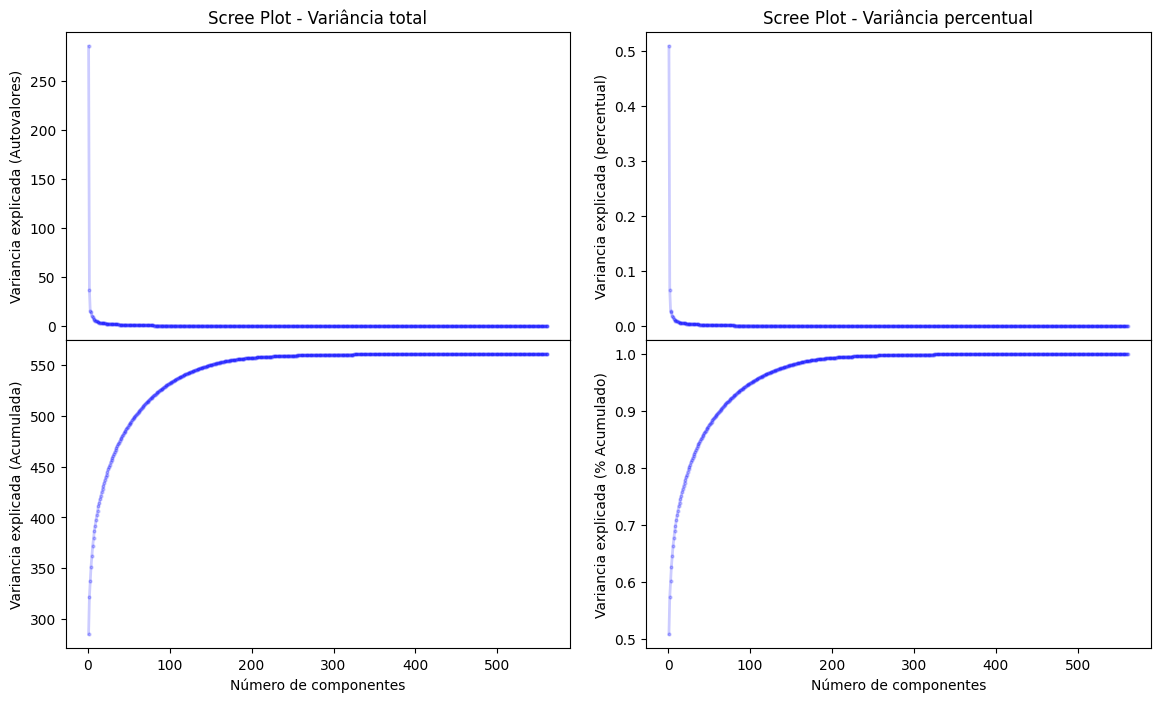

In [37]:
# Padronizado

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = princomp_pad.explained_variance_[0]

num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp_pad.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, princomp_pad.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


ampli_y2 = princomp_pad.explained_variance_ratio_[0]
# ax[1].set_ylim(-ampli_y2*.05, ampli_y2*1.1)

ax[0,1].plot(num_componentes, princomp_pad.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, princomp_pad.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

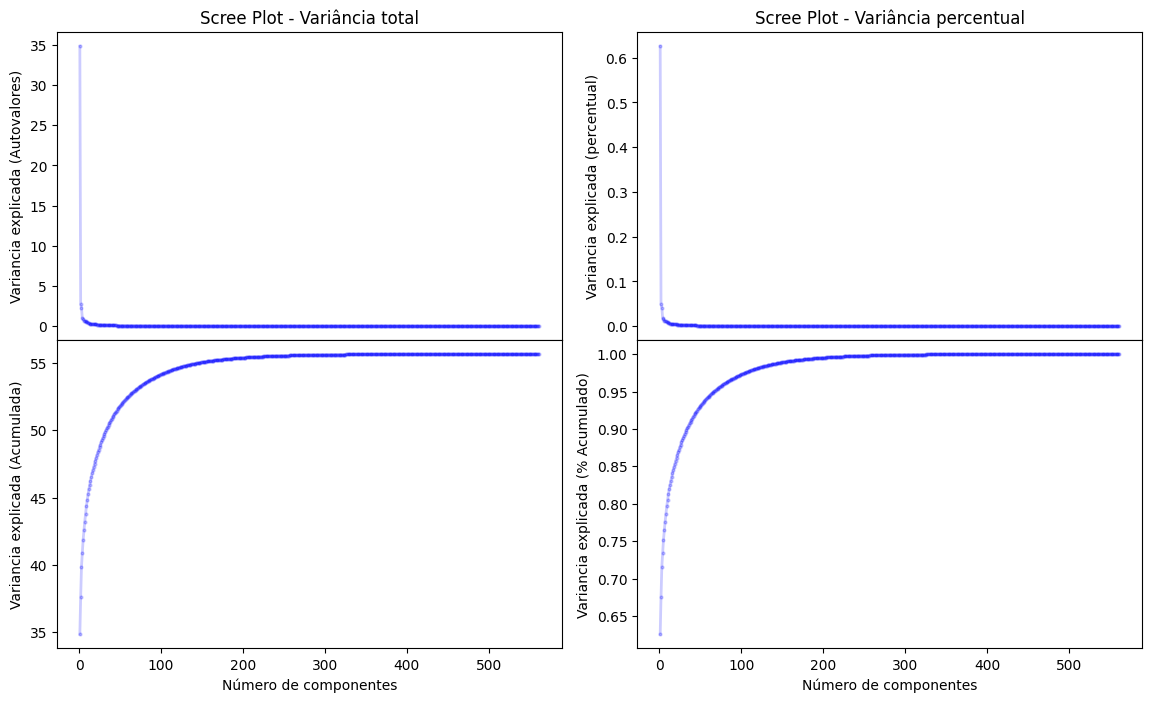

In [38]:
# Não padronizado

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = princomp.explained_variance_[0]

num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


ampli_y2 = princomp.explained_variance_ratio_[0]
# ax[1].set_ylim(-ampli_y2*.05, ampli_y2*1.1)

ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

## Insights

### A variância explicada por componente

Para o caso padronizado a primeira componente explica 284 pontos de variância, para o caso não padronizado esse valor é de 35 pontos.

### A variância explicada acumulada por componente

A soma acumada do caso pardonizado é de 561 pontos, enquanto para o outro caso, é 56 pontos.

### A variância percentual por componente

A primeira componente, no caso padronizado, explica 51% da variância total, enquanto no caso não padronizado, a primeira componente explica 63%.

### A variância percentual acumulada por componente

A soma acumulada das 5 primeiras componentes no caso padronizado explica 65% da variância total, já no caso não padronizado, explica 75% da variância total.

### Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

No caso padronizado seria necessário 63 componentes para explicar 90% da variância, enquanto para o caso não padronizado seria necessário 34 componentes.

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [41]:
%%time

# Padronizando a base de teste

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

# Base de dados padronizada

X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)

CPU times: total: 78.1 ms
Wall time: 223 ms


In [39]:
# Criando a base de validação

X_train_pad, X_valid_pad, y_train_pad, y_valid_pad = train_test_split(X_train_pad, y_train)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [48]:
%%time

prcomp_pad = PCA(n_components=10).fit(X_train_pad)

pc_treino_pad = prcomp_pad.transform(X_train_pad)
pc_teste_pad  = prcomp_pad.transform(X_test_pad)
pc_valida_pad = prcomp_pad.transform(X_valid_pad)

n=10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train_pad = pd.DataFrame(pc_treino_pad[:,:n], columns = colunas)
pc_test_pad  = pd.DataFrame(pc_teste_pad[:,:n], columns = colunas)
pc_valid_pad = pd.DataFrame(pc_valida_pad[:,:n], columns = colunas)

pc_train_pad.head()

CPU times: total: 62.5 ms
Wall time: 163 ms


,cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8,cp9,cp10
0,-16.366329,4.070950,2.572592,-3.819089,-3.609861,-2.171362,2.857667,-0.248981,0.931209,-0.910575
1,13.238423,3.065967,-2.848342,1.568421,-2.450337,2.603378,-0.429113,-1.894034,0.815018,-0.702087
2,-15.707982,3.091296,-0.166597,1.838862,3.649151,-2.580459,-0.031234,-1.880657,0.363781,-1.283040
3,-12.385024,-3.076409,-0.614901,3.602294,3.918753,3.060878,0.963664,1.943511,1.264171,1.053793
4,11.382543,-1.513617,-6.742279,0.871769,-1.787251,2.703562,-0.354585,-0.633967,3.960300,2.089760


In [49]:
%%time

prcomp = PCA(n_components=10).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)
pc_valida = prcomp.transform(X_valid)

n=10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test  = pd.DataFrame(pc_teste[:,:n], columns = colunas)
pc_valid = pd.DataFrame(pc_valida[:,:n], columns = colunas)

pc_train.head()

CPU times: total: 93.8 ms
Wall time: 159 ms


,cp1,cp2,cp3,cp4,cp5,cp6,cp7,cp8,cp9,cp10
0,-6.279862,2.174991,1.848285,-0.271408,0.573603,-0.625794,0.410749,-0.612905,0.816362,0.514409
1,7.862846,1.282883,-0.438171,-1.357311,-2.075502,-0.221295,0.378885,0.039618,0.426714,1.016952
2,-5.341691,-0.947180,-1.908080,1.398984,-0.576625,-0.550191,0.656386,0.788644,-0.926614,0.053032
3,-5.093082,-0.527068,-1.604168,0.087000,-0.058497,-0.012343,-0.983797,0.819277,1.133270,0.473174
4,7.618647,1.011743,-0.200048,-0.687321,-1.008262,0.102877,0.205835,-0.872754,0.558588,-1.472290


In [56]:
%%time

# Treinando o modelo

# Padronizado
# Rodando a árvore de decisão com ccp_alpha=0.001

clf_pad = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(pc_train_pad, y_train_pad)

# Não padronizado

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(pc_train, y_train)

CPU times: total: 31.2 ms
Wall time: 108 ms


In [62]:
# Padronizado

train_score_pad = clf_pad.score(pc_train_pad, y_train_pad)
test_score_pad = clf_pad.score(pc_test_pad, y_test)
valid_score_pad = clf_pad.score(pc_valid_pad, y_valid_pad)

print(f'train_score_pad: {train_score_pad} || test_score_pad: {test_score_pad} || valid_score_pad: {valid_score_pad}')

# Não padronizado

train_score = clf.score(pc_train, y_train)
test_score = clf.score(pc_test, y_test)
valid_score = clf.score(pc_valid, y_valid)

print(f'train_score: {train_score} || test_score: {test_score} || valid_score: {valid_score}')

train_score_pad: 0.8696046427276025 || test_score_pad: 0.7682388870037327 || valid_score_pad: 0.8117519042437432
train_score: 0.9015233949945594 || test_score: 0.8103155751611809 || valid_score: 0.8520130576713819


## Insights:

- Utilizando os dados padronizados a acurácia foi bem menor que nos dados não padronizados, em todas as três bases, treinamento, teste e validação.
- Os valores obtidos na base sem a padronização foram ligeiramente superiores ao da base padronizada.